<a href="https://colab.research.google.com/github/yuvrajsinghpanwar12/yuvi/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YULU BUSINESS CASE

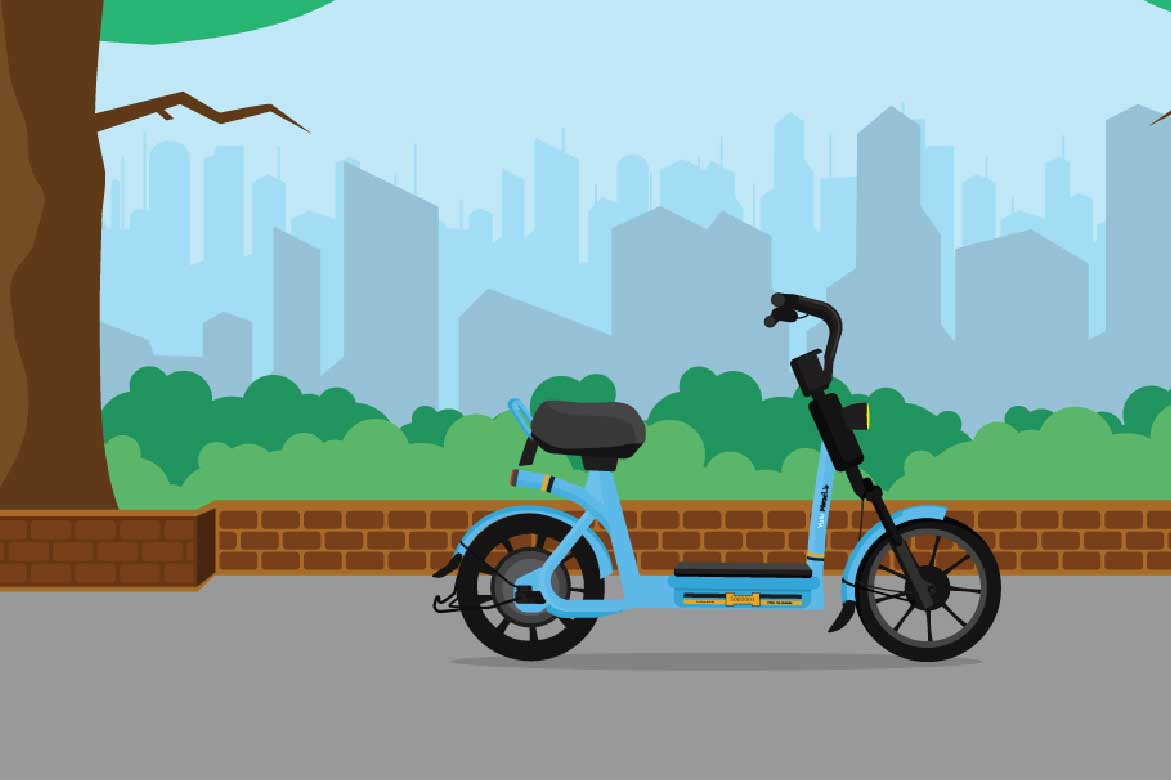

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

###**A high level overview of Yulu Case study**
* Problem Description
* Characterstics of the dataset
* Data Preprocessing
* Outliers
* EDA (Univariate & Bivariate)
* Does Working day have an effect on number of electric cyles rented?
>Two sampled T-Test

* Are number of cycles rented similar or different in different seasons?
> Annova Test (one way)

* Are number of cycles rented similar or different in different weather conditions?
> Annova Test (one way)

* Is Weather type dependent on the season?
> Chi-Square test of Independence

* Final Conclusion


**Problem Description :**

The management at Yulu having suffered dips in its revenue wants to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the American market. The company also wants to know which variables describes the electric cycles demand.

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/bike_sharing.csv')

First look at the dataset

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Column descriptions**
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday : weather day is a holiday or not (extracted from ttp://dchr.dc.gov/page/holiday-schedule)
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

In [ ]:
df.shape

(10886, 12)

There are 10886 rows and 12 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


All the columns execpt datetime are numerical columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


* The average number of users using Yulu in an hour is 191.5
* The median number of users is 145 per hour

This shows that the data has outliers since the average number of users surpasses the median number of users by a great margin

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

We have no missing data in this datset

##Data Preprocessing

Converting Weather column from numerical to categorical

In [ ]:
def season_type(x):
  if x == 1:
    return("spring")
  elif x == 2:
    return("summer")
  elif x == 3:
    return("fall")
  else:
    return("winter")

In [ ]:
df['season'] = df['season'].apply(lambda x : season_type(x))

Converting datetime column from string to datetime object

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['date'] = df['datetime'].apply(lambda x : x.date())

In [ ]:
df['day'] = df['datetime'].apply( lambda x : x.strftime("%a"))

In [ ]:
df[(df['workingday'] == 0) & (df['holiday'] == 0)].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,Sat
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,Sat
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,Sat
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,Sat
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,Sat


In [ ]:
len(df[(df['workingday'] == 0) & (df['holiday'] == 0)])/len(df)*100

29.05566783024068

**Observation** :
* We see that in some cases both working day and holiday have 0 in their respective columns. This would mean that these particular days are neither holidays nor working days but rather weekends.

In [ ]:
df['day_type'] = np.where(df['workingday'] == 1,'workday','nonworkingday')
df.drop(columns=['holiday','workingday'],inplace=True)

* Combining Holiday and Workday to a single column in the original df.
* We also delete holiday column  and workday columns since it is no longer needed.

##**EDA**

**Univariate Analysis**

In [ ]:
def univariate_plot(x,y):
  fig = plt.figure(figsize=(15,5))
  ax2 = fig.add_subplot(121)
  sns.boxplot(x,ax=ax2)
  ax = fig.add_subplot(122)
  sns.histplot(x,kde=True,ax=ax)
  ax.axvline(x.mean(), color='orange', linestyle='-',linewidth=1.5)
  ax.axvline(x.median(), color='red', linestyle='-.',linewidth=1.5)
  ax.axvline(x.mode()[0], color='green', linestyle='--',linewidth=1.5)
  ax.legend(labels=['kde','mean','median','mode'])
  ax.set_title(str(y))
  ax2.set_title(str(y))
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


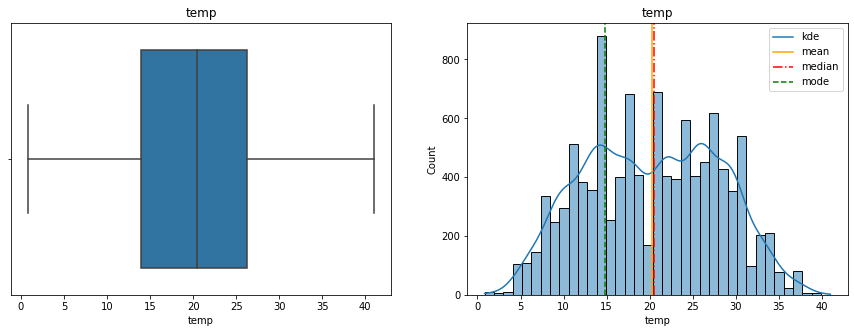

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


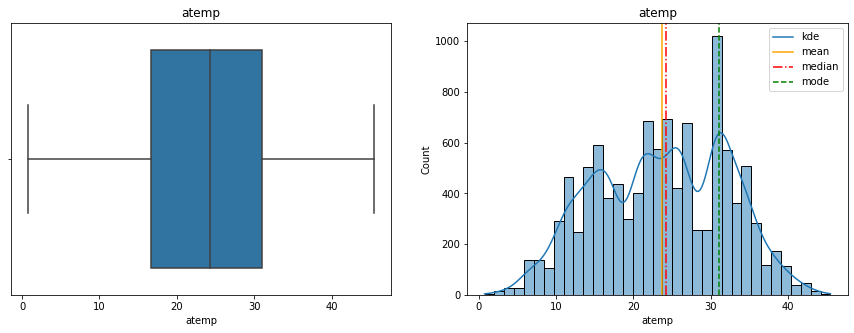

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


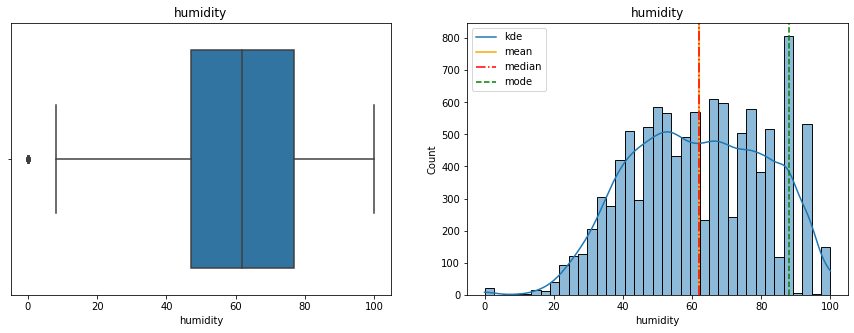

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


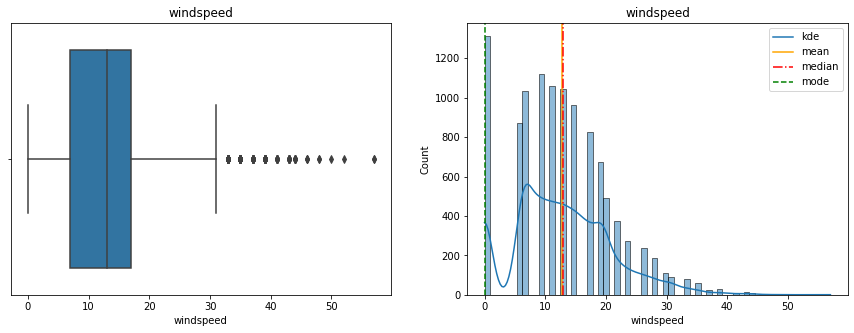

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


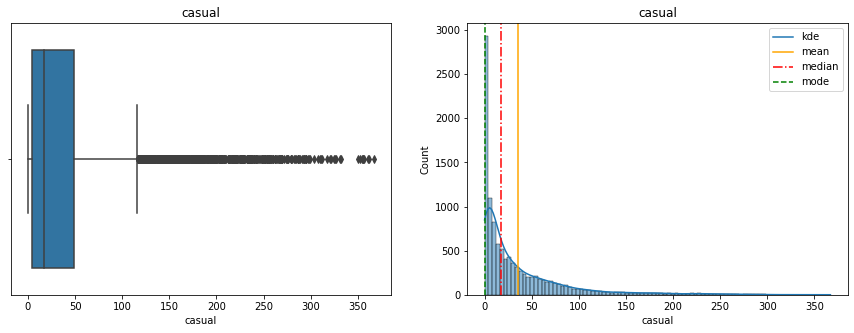

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


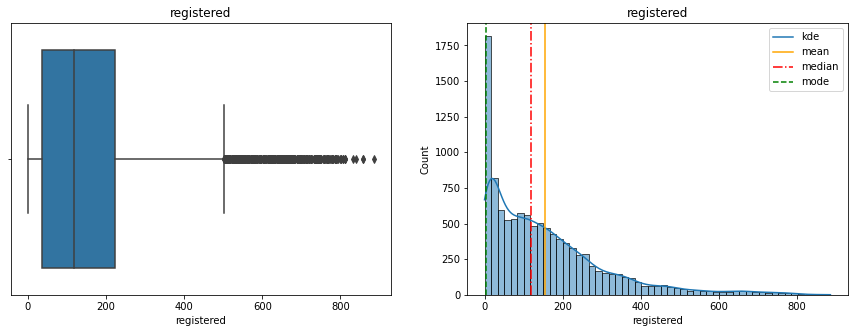

None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


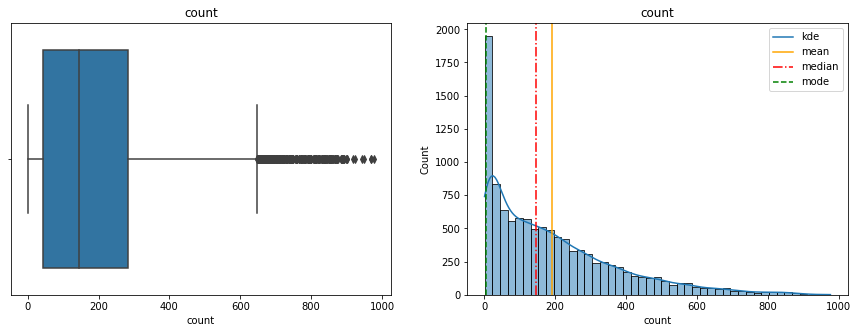

None


In [ ]:
for i in list(df.select_dtypes(include=["number"]).columns)[1:]:
  print(univariate_plot(df[i],i))

* Temperature: The mean and median temperature is around 20 and has no outliers.

* atemp : The feeling temperature is greater than the actual temperature and has a mean of 23.65 and a median of 24.24

* Humidity : The average humidity is 62. The mean and the median both are centred around 62.

* Windspeed : The average windspeed is around 13km/h. We see that there are a few outliers in the dataset where the windspeed is more than 30km/h

* Casual & Registered : There are outliers in both casual and registered number of users. The average number of times registered people tend to use YULU far outweighs the average number of times Casual people tend to use YULU.

* Count : The count just refers to combined sum of Casual and registered users.

###Outliers

In [ ]:
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1

In [ ]:
q3 + 1.5*iqr

647.0

Any value greater than 647 in the count column would constitute as an outlier.

In [ ]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [ ]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

* Looking at the earliest & the latest recorded date in the datset, we can see that we have data from 2011-01-01 to 2012-12-19.

* i.e we have data for approximately 2 years.

* Looking at the earliest recorded date, we can say for sure that the date has been offset for privacy reasons since Yulu's roll out date was in Feb 2019

In [ ]:
df[df['count'] > 647].groupby('date').count()['count']

date
2012-01-05    2
2012-01-06    1
2012-01-08    4
2012-01-10    2
2012-01-11    3
             ..
2012-12-10    2
2012-12-12    1
2012-12-13    1
2012-12-18    1
2012-12-19    1
Name: count, Length: 124, dtype: int64

* If we have a more detailed look as to when exactly outliers start appearing, it exists from January of 2012.
* We can see that there are no outliers in the year 2011.
* We can conclude that with increasing demand of YULU over the years, outliers started appearing towards the second half of the data.


The outliers are present only towards the right extreme which in this case is a good thing in company's persepective.

Hence removing the outliers would not be appropriate in my point of view.

**Average Yulu bikes rented across different seasons**

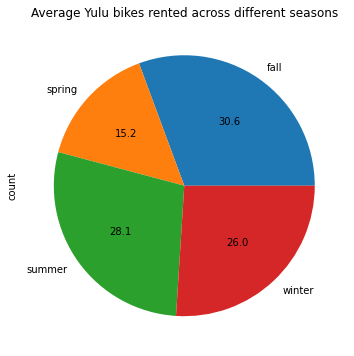

In [ ]:
df.groupby("season").mean()['count'].plot(kind='pie',autopct = "%1.1f",figsize=(6,6))
plt.title("Average Yulu bikes rented across different seasons")
plt.show()

Fall season tends to attract the most crowd for Yulu bikes followed by Winter, Summer and Spring

**Average Yulu bikes rented across different weather types**

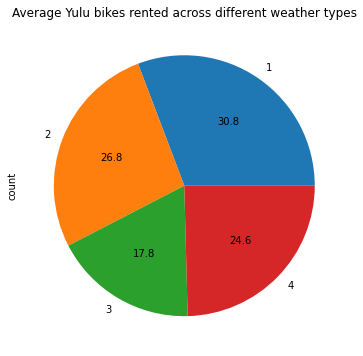

In [ ]:
df.groupby("weather").mean()['count'].plot(kind='pie',autopct='%1.1f',figsize=(6,6))
plt.title("Average Yulu bikes rented across different weather types")
plt.show()

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since weather type 4 has just one entry, we cannot make any decisions pertaining to weather type 4.

We can conclude that in general, weather type 1 has the highest demand for EV bikes followed by 2 & 3 (We haven't considered weather type4)

**Average Yulu Bikes rented across working day and non working day**

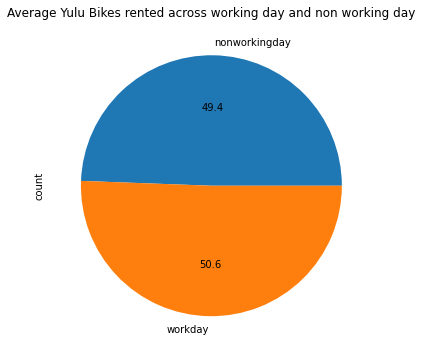

In [ ]:
df.groupby("day_type").mean()['count'].plot(kind='pie',autopct='%1.1f',figsize=(6,6))
plt.title("Average Yulu Bikes rented across working day and non working day")
plt.show()

There is not much difference in the the average Yulu bikes rented across working day and non working day



**Yulu bikes rented across different days of the week**

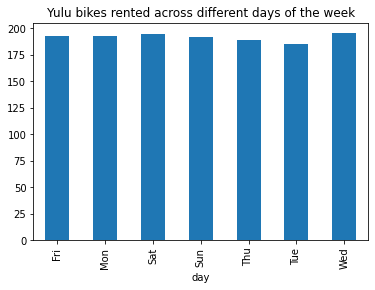

In [ ]:
df.groupby('day').mean()['count'].plot(kind='bar')
plt.title("Yulu bikes rented across different days of the week")
plt.show()

We do not observe any significant difference in Yulu bikes being rented across different days of the week

##**Answering some statistical questions**

###**Does Working day have an effect on number of electric cyles rented?**

To answer the above question we first set up Null and Alternate Hypothesis

* H0 : Working day does not have an effect on number of cycles rented
* Ha: Working day does have an effect on number of cycles rented

To test the above hypothesis, we use **Two sample T Test**


**Assumption for a T Test**


1.   Independence : The observations in one sample are independent of the observations in the other sample.

2.   Normality : Both samples are approximately normally distributed.
3. Homogenity of Variances : Both samples have approximately the same variance.
4. Random Sampling : Both samples were obtained using random sampling method



* To conduct the above experiment, we shall take the samples randomly, and also the number of electric cyles rented on Working day and non working day are independent.
* We however have to check for Normality and homogenity of Variances

In [ ]:
workday_sample = df[df['day_type'] == 'workday']['count'].sample(300)
nonworkingday_sample = df[df['day_type'] == 'nonworkingday']['count'].sample(300)

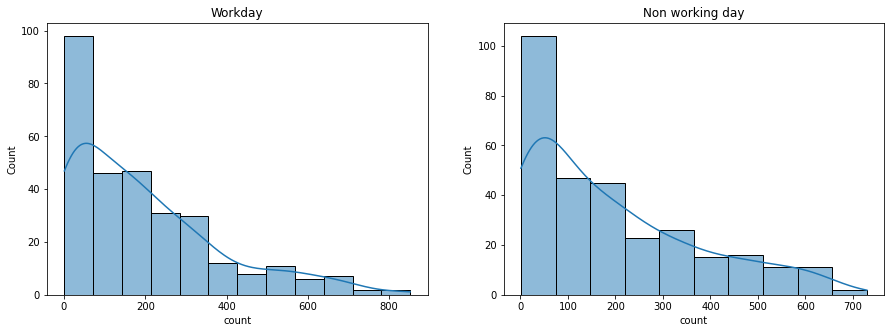

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
sns.histplot(workday_sample,kde=True,ax=ax2)
ax2.set_title("Workday")
ax = fig.add_subplot(122)
sns.histplot(nonworkingday_sample,kde=True,ax=ax)
ax.set_title("Non working day")
plt.show()

We can see that both the count of cycles rented on working day and non working day are not normally distributed.

We can try to convert the distribution to normal by applying log transformation

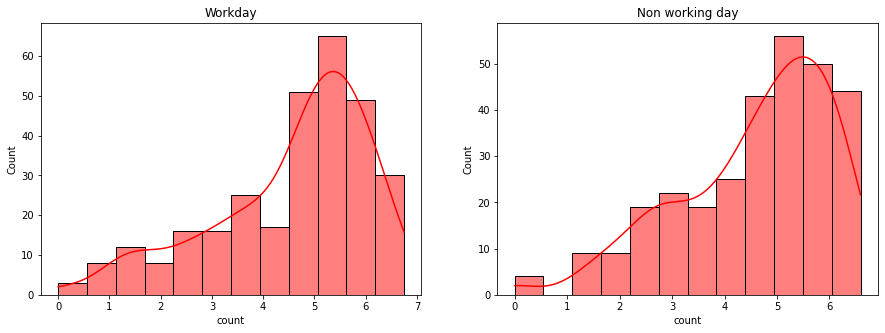

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
sns.histplot(np.log(workday_sample),kde=True,ax=ax2,color='r')
ax2.set_title("Workday")
ax = fig.add_subplot(122)
sns.histplot(np.log(nonworkingday_sample),kde=True,ax=ax,color='r')
ax.set_title("Non working day")
plt.show()

After applying log transformation to our continous variables, we have got a near normal distribution of workday_sample and nonworkingday_sample

**To check the homogenity of variances, we perform the Levene's test**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : Variance is equal in both workday count and nonworkingday count samples
* Ha: Variances is not equal


In [ ]:
import scipy.stats as stats
stats.levene(np.log(workday_sample),np.log(nonworkingday_sample),center='median')

LeveneResult(statistic=0.020885884885755306, pvalue=0.885138953727745)

* Since pvalue is not less than 0.05, we fail to reject null hypothesis.
* This means we do not have sufficient evidence to say that variance across workday count and holiday count is significantly different thus making the assumption of homogenity of variances true

**To check the normality of the samples we use Shapiro-Wilk test**






Checking the normality of **Workday samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The Workday samples are normally distributed
* Ha: The Workday samples are not normally distributed.


In [ ]:
from scipy.stats import shapiro
'{:.20f}'.format(shapiro(np.log(workday_sample))[1])

'0.00000000000283959575'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **workday sample data** does not come from normal distribution.

Checking the normality of **Non Working day samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The Non Working day samples are normally distributed
* Ha: The Non Working day samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(np.log(nonworkingday_sample))[1])

'0.00000000004604704465'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **Non working day sample data** does not come from normal distribution.

3 out of 4 assumptions for T test has been satified.

Despite the sample distribution not passing the normality test, we continue to do the T test since we have been instructed.

In [ ]:
stats.ttest_ind(a=(np.log(workday_sample)), b=(np.log(nonworkingday_sample)), equal_var=True)

Ttest_indResult(statistic=-0.16596132135669628, pvalue=0.8682434825261365)

The test statistic value is 0.165 and the pvalue is 0.868

**Conclusion**:
* Since the pvalue of our test is greater than alpha which is 0.05, we fail to reject the null hypothesis of this test.
* We do not have sufficient evidence to say that working day has an effect on number of cycles rented.



###**Are number of cycles rented similar or different in different seasons**

**To perform such an analyis, we use ANNOVA test.**

* ANNOVA refers to Analysis of Variance. It is a test to find out if the experiment results are significant.

* Here we have 4 different seasons namely spring,summer,fall & winter.
* With the Annova test, we can find out if the different seasons have same or different effect amongst the number of cycles rented.

Assumptions for Annova test:
* The population must be close to normal
* Samples must be independent
* Population variances must be equal
* Groups must have equal sample size.

We shall setup the Null and Alternate Hypothesis to check if there is any effect of season on the number of cycles rented.

* H0: All the 4 different seasons have equal means

* Ha: There is atleast one season that differs significantly from the overall mean of dependent variable.

In [ ]:
df['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

In [ ]:
spring_sample = df[df['season'] == 'spring'].sample(300)['count']
summer_sample = df[df['season'] == 'summer'].sample(300)['count']
fall_sample = df[df['season'] == 'fall'].sample(300)['count']
winter_sample = df[df['season'] == 'winter'].sample(300)['count']

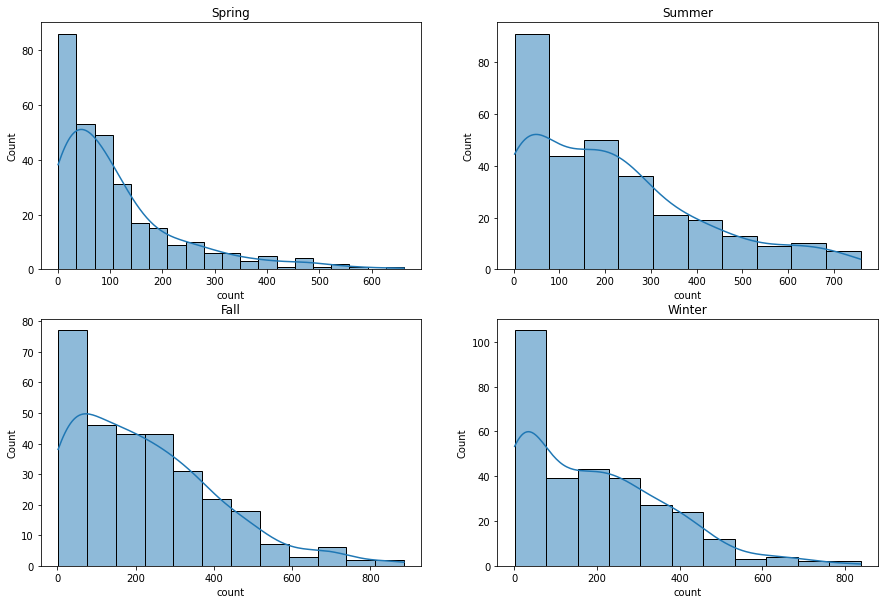

In [ ]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(221)
sns.histplot(spring_sample,kde=True,ax=ax2)
ax2.set_title("Spring")
ax = fig.add_subplot(222)
sns.histplot(summer_sample,kde=True,ax=ax)
ax.set_title("Summer")
ax3 = fig.add_subplot(223)
sns.histplot(fall_sample,kde=True,ax=ax3)
ax3.set_title("Fall")
ax4 = fig.add_subplot(224)
sns.histplot(winter_sample,kde=True,ax=ax4)
ax4.set_title("Winter")
plt.show()

We see that none of the graphs are normally distributed. Hence we apply lof transformation to make these distributions near to normal

In [ ]:
log_spring = np.log(spring_sample)
log_summer = np.log(summer_sample)
log_fall = np.log(fall_sample)
log_winter = np.log(winter_sample)

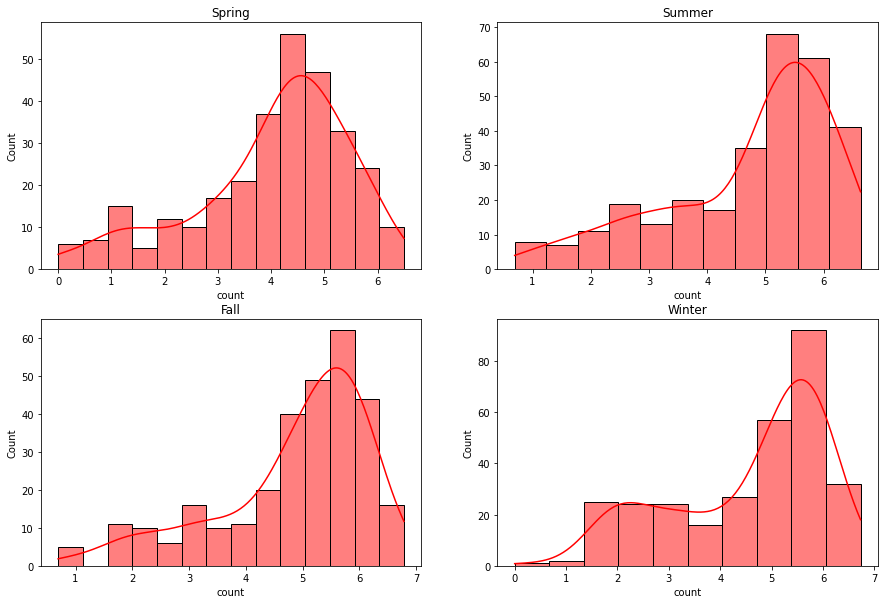

In [ ]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(221)
sns.histplot(log_spring,kde=True,ax=ax2,color='r')
ax2.set_title("Spring")
ax = fig.add_subplot(222)
sns.histplot(log_summer,kde=True,ax=ax,color='r')
ax.set_title("Summer")
ax3 = fig.add_subplot(223)
sns.histplot(log_fall,kde=True,ax=ax3,color='r')
ax3.set_title("Fall")
ax4 = fig.add_subplot(224)
sns.histplot(log_winter,kde=True,ax=ax4,color='r')
ax4.set_title("Winter")
plt.show()

We have satified the conditions wherein samples must be independent and the groups have equal sample size. We should now check for the homogenity of variance and the normality of the distribution.

**We perform Levene's test to check the homogenity of variances**
* H0 : The variance is equal across all groups
* Ha : The variance is not equal across the groups

In [ ]:
stats.levene(log_spring,log_summer,log_fall,log_winter,center='median')

LeveneResult(statistic=1.9741265085138868, pvalue=0.11606023492428764)

* Since pvalue is not less than 0.05, we fail to reject the null hypothesis.
* This means we do not have sufficient evidence to say that variance across different season's is significantly different thus making the assumption of homogenity of variances true.

**Shapiro-Wilk test to check the normality of the distribution**

Checking the normality of **Spring season samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The Spring season samples are normally distributed
* Ha: The Spring season samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_spring)[1])

'0.00000000011089572316'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **Spring season sample data** does not come from normal distribution.

Checking the normality of **Summer season samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The Summer season samples are normally distributed
* Ha: The Summer season samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_summer)[1])

'0.00000000000017190929'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **Summer season sample data** does not come from normal distribution.

Checking the normality of **Fall season samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The Fall season samples are normally distributed
* Ha: The Fall season samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_fall)[1])

'0.00000000000009054996'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **Fall season sample data** does not come from normal distribution.

Checking the normality of **Winter season samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The Winter season samples are normally distributed
* Ha: The Winter season samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_winter)[1])

'0.00000000000011954173'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **Winter season sample data** does not come from normal distribution.

**3 out of 4 assumptions for Annova test have been satisfied. We continue to do the test since we have been instructed to do so.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(log_spring,log_summer,log_fall,log_winter)

F_onewayResult(statistic=19.427162344279502, pvalue=2.6603013681805553e-12)

In [ ]:
'{:.20f}'.format(f_oneway(log_spring,log_summer,log_fall,log_winter)[1])

'0.00000000000266030137'

**Conclusion**
* The f test statistic value is 19.42 and the corresponding pvalue is 0.00000000000266030137 . Since the pvalue is lesser than 0.05 we reject the null hypothesis.

* This means we have sufficient evidence to say that there is a difference in number of bikes rented among the 4 different types of season.


**One main disadvantage of Annova test is that it can tell if there is a difference in number of bikes rented across different seasons but it cannot pinpoint on which exact season is significantly different.**

###**Are number of cycles rented similar or different in different weather conditions?**

The 4 different weather conditions are as follows.
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We have to check if there is any significant difference in the number of bikes rented across different weather conditions. To analyse this, we use Annova test.

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

We see that the weather condition "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" is very rare and has occured just once in this dataset. We do not have sufficient data on weather type 4 to conculude whether or not it has an effect on the number of cycles rented. Hence it would be best to delete the weather type 4 so as to not have any bias.

We shall setup the Null and Alternate Hypothesis to check if there is any effect of weather on the number of cycles rented.

* H0: All the 3 different weather types have equal means (number of cycles rented).

* Ha: There is atleast one weather that differs significantly from the overall mean of dependent variable.

We keep the level of signifiance as 5%

We have to ensure that the 4 assumptions of Annova needs to be satisfied before performing the test.

In [ ]:
sample_1 = df[df['weather'] == 1].sample(300)['count']
sample_2 = df[df['weather'] == 2].sample(300)['count']
sample_3 = df[df['weather'] == 3].sample(300)['count']

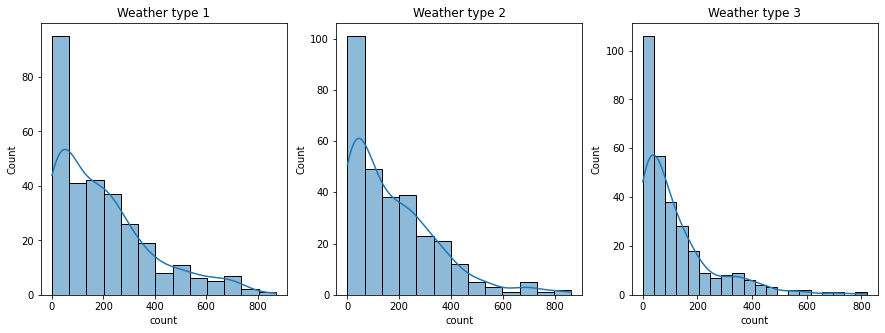

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(131)
sns.histplot(sample_1,kde=True,ax=ax2)
ax2.set_title("Weather type 1")
ax = fig.add_subplot(132)
sns.histplot(sample_2,kde=True,ax=ax)
ax.set_title("Weather type 2")
ax3 = fig.add_subplot(133)
sns.histplot(sample_3,kde=True,ax=ax3)
ax3.set_title("Weather type 3")
plt.show()

We see that none of the weather type distributions follow normal distribution.

Hence we apply log transformation to make the distributions near to normal.

In [ ]:
log_1 = np.log(sample_1)
log_2 = np.log(sample_2)
log_3 = np.log(sample_3)

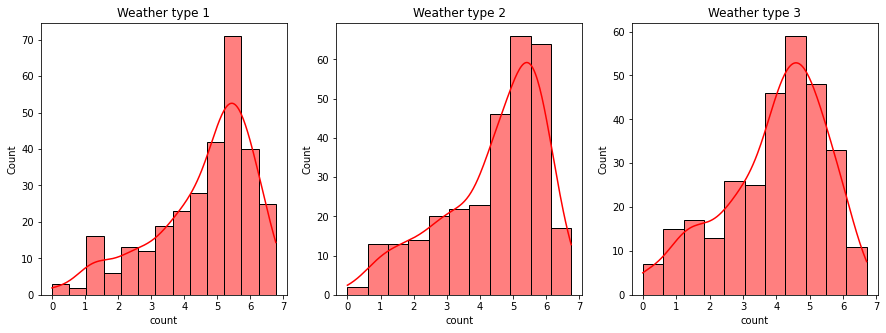

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(131)
sns.histplot(log_1,kde=True,ax=ax2,color='r')
ax2.set_title("Weather type 1")
ax = fig.add_subplot(132)
sns.histplot(log_2,kde=True,ax=ax,color='r')
ax.set_title("Weather type 2")
ax3 = fig.add_subplot(133)
sns.histplot(log_3,kde=True,ax=ax3,color='r')
ax3.set_title("Weather type 3")
plt.show()

We have satified the conditions wherein samples must be independent and the groups have equal sample size. We should now check for the homogenity of variance and the normality of the distribution.

**We perform Levene's test to check the homogenity of variances**
* H0 : The variance is equal across all groups
* Ha : The variance is not equal across the groups

In [ ]:
stats.levene(log_1,log_2,log_3,center='median')

LeveneResult(statistic=0.18626894773652874, pvalue=0.8300824230324502)

* Since pvalue is not less than 0.05, we fail to reject null hypothesis.
* This means we do not have sufficient evidence to say that variance across different weather's is significantly different thus making the assumption of homogenity of variances true.

**Shapiro-Wilk test to check the normality of the distribution**

Checking the normality of **weather type 1 samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The weather type 1 samples are normally distributed
* Ha: The weather type 1 samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_1)[1])

'0.00000000000175905872'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **weather type 1 sample data** does not come from normal distribution.

Checking the normality of **weather type 2 samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The weather type 2 samples are normally distributed
* Ha: The weather type 2 samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_2)[1])

'0.00000000001081850581'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **weather type 2 sample data** does not come from normal distribution.

Checking the normality of **weather type 3 samples**


> We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:
* H0 : The weather type 3 samples are normally distributed
* Ha: The weather type 3 samples are not normally distributed.


In [ ]:
'{:.20f}'.format(shapiro(log_3)[1])

'0.00000001329939625094'

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have sufficient evidence to say that the **weather type 3 sample data** does not come from normal distribution.

**3 out of 4 assumptions for Annova test have been satisfied. We continue to do the test since we have been instructed to do so.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(log_1,log_2,log_3)

F_onewayResult(statistic=13.35025452005413, pvalue=1.9349740671820737e-06)

In [ ]:
'{:.20f}'.format(f_oneway(log_1,log_2,log_3)[1])

'0.00000193497406718207'

**Conclusion**
* The f test statistic value is 13.35 and the corresponding pvalue is 0.00000193497406718207. Since the pvalue is lesser than 0.05 we reject the null hypothesis.

* This means we have sufficient evidence to say that there is a difference in number of bikes rented among the 3 different types of weather conditions.


###**Is  Weather type dependent on the season?**

**To perform such an analysis we perform Chi square test**

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables

The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables.

Also it is important to know that Chi-Square test is non parametric test meaning that it is distribution free (need not have gaussian distribution)

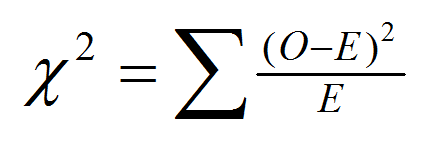

where

* O : Observed value of the variables
* E : Expected value of the variables
* X^2 : The value of Chi Square

We shall setup Null and alternate Hypotheis to check if Weather is dependent on season

* H0: (null hypothesis) The two variables are independent.
* H1: (alternative hypothesis) The two variables are not independent. (i.e. they are associated)

We consider level of significance as 0.05

Let's now go over the assumptions of Chi-Square test

* **Both variables are categorical**:


> In this dataset, season column has already been converted into categorical data and the weather column is nominal data. Hence it is safe to say that the above condition is satisfied.

* **All observations are independent**:


> We are hoping that the sample provided by YULU has been obtained from random sampling upon which the condition is satisfied.

* **Cells in the contingency table are mutually exclusive**


> Assuming each individual in the dataset was only surveyed once, this assumption should be met.

* **Expected value of cells should be 5 or greater in at least 80% of cells and none less than 1**


> We shall check for this condition after the pearson chi-square test has been completed.









In [ ]:
data = pd.crosstab(df['weather'],df['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data)

In [ ]:
'{:.20f}'.format(p)

'0.00000015499250736865'

The p value is less than 0.05

In [ ]:
expected.min()

0.24673893073672606

The lowest expected value is 0.246. It should be noted that this contradicts the assumption of chi-squared test.

In [ ]:
len(expected[expected<5])/len(expected)*100

100.0

100% of the data points have expected value greater than 5

Although 100% of expected data is more than 5, we find that one of the cell has expected value less than 1 i.e 0.246

**Since all of the assumptions of chi-square test have not been met, the test would not be ideal.**

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

As mentioned earlier, since weather type 4 has only one row in this entire dataset, Let us now perform chi-square test by removing the row with weather type 4. This should hopefully be able to satisfy all the assumptions of chi square test.

In [ ]:
df_removed_weather = df[~(df['weather'] == 4)]

In [ ]:
data2 = pd.crosstab(df_removed_weather['weather'],df_removed_weather['season'])

In [ ]:
data2

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225


In [ ]:
stat2, p2, dof2, expected2 = chi2_contingency(data2)

In [ ]:
expected2.min()

211.88929719797886

The expected min value is 211 unlike the earlier case wherein it was 0.246.

**Thus it is safe to say that all the assumptions of chi-square test has been met.**

In [ ]:
len(expected2[expected2<5])/len(expected2)*100

0.0

100% of the data points have expected value greater than 5 just like in the earlier case.

In [ ]:
'{:.20f}'.format(p2)

'0.00000002826001450993'

**Conclusion**
* The pvalue is less than 0.05, hence we can reject the null hypothesis.
* We have sufficient evidence to say that Weather and Season variables are dependent

**Final Conclusion**

Some of the variables that influence electric cycles demand are:
* Weather : Electric cycles are most sought on weather type 1 followed by 2 and 3 ( We omit 4 since we do not have much data)


> We even performed ANNOVA test to verify that there is a significant difference amongst Yulu bikes being rented across different weather types.

* Season : Electric cycles are most sought on Fall season followed by Winter, Summer and Spring.



> We have verified the statistical significance here as well with the help of ANNOVA to check if there is difference in Yulu bikes being rented across different seasons.



